# Neural Network with one hidden layer: sqrt(x)

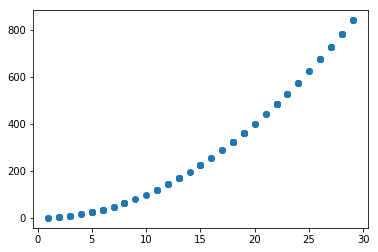

In [1]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# generate data
train_x = np.expand_dims(np.random.randint(1, 30, 100),1)
train_y = train_x*train_x

# plot input data
plt.scatter(train_x, train_y)
plt.show()

In [2]:
#
# Builds a simple NN with one hidden layer
#
def build_model(input_features, hidden_units, output_features):
    
    # inputs
    X = tf.placeholder(tf.float32,[None,input_features], name="input")
    
    # hiden layer
    w = tf.Variable(tf.random_uniform([input_features, hidden_units]))
    b = tf.Variable(tf.random_uniform([1, hidden_units]))
    layer_1 = tf.nn.relu(tf.add(tf.matmul(X, w), b))

    # output layer
    w2 = tf.Variable(tf.random_uniform([hidden_units, 1]))
    b2 = tf.Variable(tf.random_uniform([1, 1]))
    prediction = tf.nn.relu(tf.add(tf.matmul(layer_1, w2), b2))
    
    # targets
    Y = tf.placeholder(tf.float32,[None,1], name="output")
    
    return X, prediction, Y

Instructions for updating:
Use `tf.global_variables_initializer` instead.


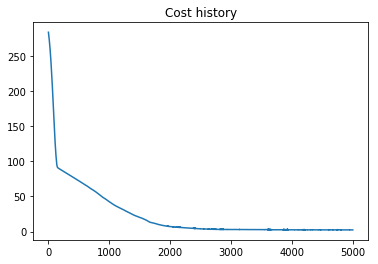

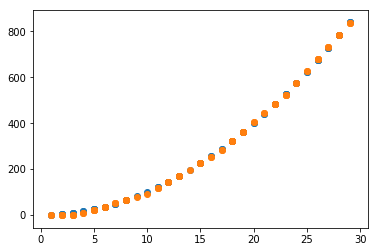

In [3]:
# build our model
X, Y_pred, Y = build_model(input_features=train_x.shape[1], 
                           hidden_units=4, 
                           output_features=1)

# create optimizer
learning_rate = 1e-2
cost = tf.losses.absolute_difference(Y, Y_pred)
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

# run training
sess = tf.Session()
sess.run(tf.initialize_all_variables())
training_epochs = 5000
cost_history = np.array([])
for epoch in range(training_epochs):
    _, _cost = sess.run([optimizer,cost],feed_dict={X:train_x,Y:train_y})
    cost_history = np.append(cost_history,_cost)
        
# plot cost history
plt.plot(cost_history)
plt.title('Cost history')
plt.show()

# check predictions
predictions = sess.run(Y_pred, feed_dict={X: train_x})
plt.scatter(train_x, train_y)
plt.scatter(train_x, predictions)
plt.show()